In [36]:
!pip install neuralprophet
!pip install plotly

In [37]:
import pandas as pd
import seaborn as sns
from neuralprophet import NeuralProphet

wdata = pd.read_csv("bwi_climate_dataset.csv")
wdata.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,ADPT,ADPT_ATTRIBUTES,ASLP,ASLP_ATTRIBUTES,...,WSF1,WSF1_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES
0,USW00093721,1939-07,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00093721,1939-08,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00093721,1939-09,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00093721,1939-10,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00093721,1939-11,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
nullweather = wdata.apply(pd.isnull).sum()/wdata.shape[0]
nullweather

STATION            0.000000
DATE               0.000000
LATITUDE           0.000000
LONGITUDE          0.000000
ELEVATION          0.000000
                     ...   
WSF5_ATTRIBUTES    0.677579
WSFG               0.738095
WSFG_ATTRIBUTES    0.738095
WSFM               0.738095
WSFM_ATTRIBUTES    0.738095
Length: 100, dtype: float64

In [39]:
newcol = wdata.columns[nullweather < .05]
newcol

Index(['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'CDSD',
       'CDSD_ATTRIBUTES', 'CLDD', 'CLDD_ATTRIBUTES', 'DP01', 'DP01_ATTRIBUTES',
       'DP10', 'DP10_ATTRIBUTES', 'DP1X', 'DP1X_ATTRIBUTES', 'DSND',
       'DSND_ATTRIBUTES', 'DSNW', 'DSNW_ATTRIBUTES', 'DT00', 'DT00_ATTRIBUTES',
       'DT32', 'DT32_ATTRIBUTES', 'DX32', 'DX32_ATTRIBUTES', 'DX70',
       'DX70_ATTRIBUTES', 'DX90', 'DX90_ATTRIBUTES', 'EMNT', 'EMNT_ATTRIBUTES',
       'EMSD', 'EMSD_ATTRIBUTES', 'EMSN', 'EMSN_ATTRIBUTES', 'EMXP',
       'EMXP_ATTRIBUTES', 'EMXT', 'EMXT_ATTRIBUTES', 'HDSD', 'HDSD_ATTRIBUTES',
       'HTDD', 'HTDD_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW',
       'SNOW_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES',
       'TMIN', 'TMIN_ATTRIBUTES'],
      dtype='object')

In [40]:
wdata = wdata[newcol].copy()
wdata.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USW00093721,1939-07,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,NaN,197.3,",X",...,66.0,",,,X",0.0,",,,Z",24.70,",X",29.72,",,,X",19.68,",,,X"
1,USW00093721,1939-08,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,NaN,240.4,",X",...,90.0,",,,X",0.0,",,,Z",26.09,",X",31.10,",,,X",21.07,",,,X"
2,USW00093721,1939-09,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,NaN,94.5,",X",...,100.2,",,,X",0.0,",,,Z",21.10,",X",26.43,",,,X",15.78,",,,X"
3,USW00093721,1939-10,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,NaN,21.9,",X",...,111.0,",,,X",0.0,",,,Z",14.31,",X",20.12,",,,X",8.49,",,,X"
4,USW00093721,1939-11,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,NaN,0.0,"2,X",...,23.7,",,,X",0.0,",,,Z",7.46,"2,X",12.96,"1,,,X",1.96,"1,,,X"


In [41]:
wdata = wdata.ffill()
wdata.apply(pd.isnull).sum()

STATION            0
DATE               0
LATITUDE           0
LONGITUDE          0
ELEVATION          0
NAME               0
CDSD               6
CDSD_ATTRIBUTES    6
CLDD               0
CLDD_ATTRIBUTES    0
DP01               0
DP01_ATTRIBUTES    0
DP10               0
DP10_ATTRIBUTES    0
DP1X               0
DP1X_ATTRIBUTES    0
DSND               0
DSND_ATTRIBUTES    0
DSNW               0
DSNW_ATTRIBUTES    0
DT00               0
DT00_ATTRIBUTES    0
DT32               0
DT32_ATTRIBUTES    0
DX32               0
DX32_ATTRIBUTES    0
DX70               0
DX70_ATTRIBUTES    0
DX90               0
DX90_ATTRIBUTES    0
EMNT               0
EMNT_ATTRIBUTES    0
EMSD               0
EMSD_ATTRIBUTES    0
EMSN               0
EMSN_ATTRIBUTES    0
EMXP               0
EMXP_ATTRIBUTES    0
EMXT               0
EMXT_ATTRIBUTES    0
HDSD               0
HDSD_ATTRIBUTES    0
HTDD               0
HTDD_ATTRIBUTES    0
PRCP               0
PRCP_ATTRIBUTES    0
SNOW               0
SNOW_ATTRIBUT

In [42]:
wdata.dtypes

STATION             object
DATE                object
LATITUDE           float64
LONGITUDE          float64
ELEVATION          float64
NAME                object
CDSD               float64
CDSD_ATTRIBUTES     object
CLDD               float64
CLDD_ATTRIBUTES     object
DP01               float64
DP01_ATTRIBUTES     object
DP10               float64
DP10_ATTRIBUTES     object
DP1X               float64
DP1X_ATTRIBUTES     object
DSND               float64
DSND_ATTRIBUTES     object
DSNW               float64
DSNW_ATTRIBUTES     object
DT00               float64
DT00_ATTRIBUTES     object
DT32               float64
DT32_ATTRIBUTES     object
DX32               float64
DX32_ATTRIBUTES     object
DX70               float64
DX70_ATTRIBUTES     object
DX90               float64
DX90_ATTRIBUTES     object
EMNT               float64
EMNT_ATTRIBUTES     object
EMSD               float64
EMSD_ATTRIBUTES     object
EMSN               float64
EMSN_ATTRIBUTES     object
EMXP               float64
E

In [43]:
worddrop = "ATTRIBUTES"
coldrop = [col for col in wdata.columns if worddrop in col]
wdata.drop(columns=coldrop, inplace=True)
wdata

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CLDD,DP01,DP10,...,EMSN,EMXP,EMXT,HDSD,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00093721,1939-07,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,197.3,13.0,7.0,...,0.0,23.1,35.6,0.0,0.0,66.0,0.0,24.70,29.72,19.68
1,USW00093721,1939-08,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,240.4,10.0,4.0,...,0.0,58.2,36.7,0.0,0.0,90.0,0.0,26.09,31.10,21.07
2,USW00093721,1939-09,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,94.5,8.0,4.0,...,0.0,31.0,37.8,11.4,11.4,100.2,0.0,21.10,26.43,15.78
3,USW00093721,1939-10,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,21.9,7.0,7.0,...,0.0,45.2,33.9,158.1,146.7,111.0,0.0,14.31,20.12,8.49
4,USW00093721,1939-11,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,0.0,5.0,2.0,...,0.0,17.3,22.8,464.6,306.5,23.7,0.0,7.46,12.96,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,USW00093721,2023-02,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.0,0.0,8.0,4.0,...,5.0,19.6,26.1,1575.1,315.1,55.4,5.0,7.08,12.95,1.20
1004,USW00093721,2023-03,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",0.6,0.6,9.0,5.0,...,0.0,13.2,26.7,1888.8,313.7,37.9,0.0,8.23,13.98,2.48
1005,USW00093721,2023-04,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",27.8,27.2,8.0,6.0,...,0.0,46.2,31.7,1997.6,108.8,104.6,0.0,15.61,22.21,9.02
1006,USW00093721,2023-05,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",46.9,19.1,8.0,2.0,...,0.0,7.6,29.4,2055.1,57.5,14.0,0.0,17.09,23.84,10.35


In [44]:
wdata['DATE'] = pd.to_datetime(wdata["DATE"])
wdata.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CLDD,DP01,DP10,...,EMSN,EMXP,EMXT,HDSD,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00093721,1939-07-01,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,197.3,13.0,7.0,...,0.0,23.1,35.6,0.0,0.0,66.0,0.0,24.70,29.72,19.68
1,USW00093721,1939-08-01,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,240.4,10.0,4.0,...,0.0,58.2,36.7,0.0,0.0,90.0,0.0,26.09,31.10,21.07
2,USW00093721,1939-09-01,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,94.5,8.0,4.0,...,0.0,31.0,37.8,11.4,11.4,100.2,0.0,21.10,26.43,15.78
3,USW00093721,1939-10-01,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,21.9,7.0,7.0,...,0.0,45.2,33.9,158.1,146.7,111.0,0.0,14.31,20.12,8.49
4,USW00093721,1939-11-01,39.17329,-76.68408,42.0,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",NaN,0.0,5.0,2.0,...,0.0,17.3,22.8,464.6,306.5,23.7,0.0,7.46,12.96,1.96


In [45]:
wdata.dtypes

STATION              object
DATE         datetime64[ns]
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
NAME                 object
CDSD                float64
CLDD                float64
DP01                float64
DP10                float64
DP1X                float64
DSND                float64
DSNW                float64
DT00                float64
DT32                float64
DX32                float64
DX70                float64
DX90                float64
EMNT                float64
EMSD                float64
EMSN                float64
EMXP                float64
EMXT                float64
HDSD                float64
HTDD                float64
PRCP                float64
SNOW                float64
TAVG                float64
TMAX                float64
TMIN                float64
dtype: object

In [46]:
data = wdata[['DATE','TAVG','EMXT','TMAX','TMIN','CLDD','EMXP','PRCP','SNOW']]
data.dropna(inplace = True)
data.columns = ['Date','Temp. Avg','Extreme Max Temp.','Temp. Max','Temp. Min','Cloud Cover','Extreme Max Precip.','Precipitation','Snow']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\meand\AppData\Local\Temp\ipykernel_25988\92884658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)



,Date,Temp. Avg,Extreme Max Temp.,Temp. Max,Temp. Min,Cloud Cover,Extreme Max Precip.,Precipitation,Snow
0,1939-07-01,24.70,35.6,29.72,19.68,197.3,23.1,66.0,0.0
1,1939-08-01,26.09,36.7,31.10,21.07,240.4,58.2,90.0,0.0
2,1939-09-01,21.10,37.8,26.43,15.78,94.5,31.0,100.2,0.0
3,1939-10-01,14.31,33.9,20.12,8.49,21.9,45.2,111.0,0.0
4,1939-11-01,7.46,22.8,12.96,1.96,0.0,17.3,23.7,0.0


WARNING - (py.warnings._showwarnmsg) - C:\Users\meand\AppData\Local\Temp\ipykernel_25988\387321013.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dcorr = data.corr()



<Axes: >

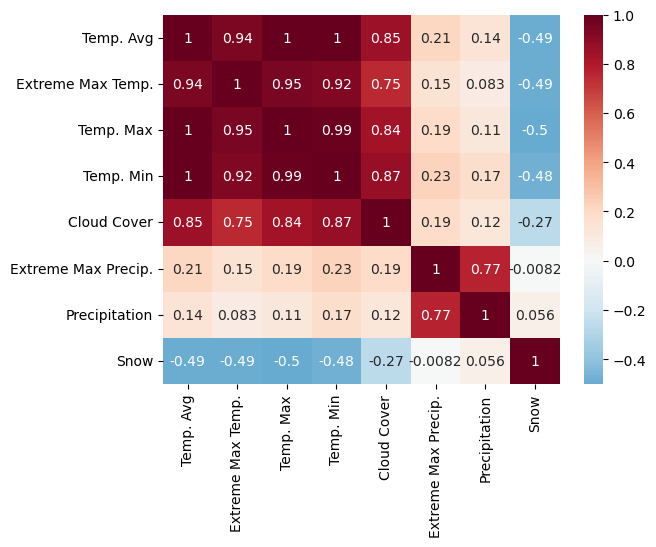

In [47]:
dcorr = data.corr()
sns.heatmap(dcorr, cmap='RdBu_r', center=0.0, annot=True)

In [48]:
tavg_data = wdata[['DATE', 'TAVG']].copy()
tavg_data.dropna(inplace=True)
tavg_data.columns = ['ds', 'y']

# Initializing NeuralProphet
model_tavg = NeuralProphet(
    n_forecasts=12,
    epochs=100,
)

# Fit the model
model_tavg.fit(tavg_data)

# Create future dates for forecasting TAVG
future_tavg = model_tavg.make_future_dataframe(tavg_data, periods=12, n_historic_predictions=len(tavg_data))

# Make predictions for TAVG using the trained model
forecast_tavg = model_tavg.predict(future_tavg)

# Display the forecast for TAVG
print("Forecast for TAVG:")
print(forecast_tavg.head())

# Selecting and preprocessing data for EMXP
emxp_data = wdata[['DATE', 'EMXP']].copy()
emxp_data.dropna(inplace=True)
emxp_data.columns = ['ds', 'y']

# Initializing NeuralProphet
model_emxp = NeuralProphet(
    n_forecasts=12, 
    epochs=100,
)

# Fit the model for predicting EMXP
model_emxp.fit(emxp_data)

# Create future dates for forecasting EMXP
future_emxp = model_emxp.make_future_dataframe(emxp_data, periods=12, n_historic_predictions=len(emxp_data))

# Make predictions for EMXP using the trained model
forecast_emxp = model_emxp.predict(future_emxp)

# Display the forecast for EMXP
print("Forecast for EMXP:")
print(forecast_emxp.head())

# Select and preprocess data for SNOW prediction
snow_data = wdata[['DATE', 'SNOW']].copy()
snow_data.dropna(inplace=True)
snow_data.columns = ['ds', 'y']

# Initialize the NeuralProphet model for SNOW prediction
model_snow = NeuralProphet(
    n_forecasts=12,  # Number of future data points to forecast (12 months)
    epochs=100,       # Number of training epochs
)

# Fits model for snow prediction
model_snow.fit(snow_data)

# Create future dates for forecasting the snow
future_snow = model_snow.make_future_dataframe(snow_data, periods=12, n_historic_predictions=len(snow_data))

# Make predictions using the model
forecast_snow = model_snow.predict(future_snow)

# Display forecast
print("Forecast for SNOW:")
print(forecast_snow.head())

# Create future dates for forecasting
future_tavg = model_tavg.make_future_dataframe(tavg_data, periods=900)
future_emxp = model_emxp.make_future_dataframe(emxp_data, periods=900)
future_snow = model_snow.make_future_dataframe(snow_data, periods=900)

# Forecast weather for the future dates using the trained models
forecast_tavg = model_tavg.predict(future_tavg)
forecast_emxp = model_emxp.predict(future_emxp)
forecast_snow = model_snow.predict(future_snow)

# Display the forecasted weather for the future dates
print("Forecast for TAVG:")
print(forecast_tavg.head())

print("\nForecast for EMXP:")
print(forecast_emxp.head())

print("\nForecast for SNOW:")
print(forecast_snow.head())

WARNING - (NP.forecaster.__init__) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/126 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.79E-02, min: 8.17E-01


  0%|          | 0/126 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.79E-02, min: 1.58E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.73E-02
Epoch[100/100]: 100%|██████████| 100/100 [00:11<00:00,  8.87it/s, SmoothL1Loss=0.0015, MAE=1.3, RMSE=1.67, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._showwarnmsg) - C:\Users\meand\anaconda3\lib\site-packages\neuralprophet\forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major f

  0%|          | 0/126 [00:00<?, ?it/s]

Forecast for TAVG:
          ds      y      yhat1  residual1      trend  season_yearly
0 1939-07-01  24.70  25.328138   0.628138  13.207012      12.121125
1 1939-08-01  26.09  24.375780  -1.714220  13.213232      11.162547
2 1939-09-01  21.10  20.540979  -0.559021  13.219450       7.321531
3 1939-10-01  14.31  14.159807  -0.150193  13.225468       0.934338
4 1939-11-01   7.46   8.292093   0.832093  13.231688      -4.939594


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.79E-02, min: 2.21E+00


  0%|          | 0/126 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.79E-02, min: 5.06E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.73E-02
Epoch[100/100]: 100%|██████████| 100/100 [00:10<00:00,  9.11it/s, SmoothL1Loss=0.0412, MAE=14.7, RMSE=19.7, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._showwarnmsg) - C:\Users\meand\anaconda3\lib\site-packages\neuralprophet\forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major 

  0%|          | 0/126 [00:00<?, ?it/s]

Forecast for EMXP:
          ds     y      yhat1  residual1      trend  season_yearly
0 1939-07-01  23.1  38.299412  15.199412  31.888388       6.411025
1 1939-08-01  58.2  40.907978 -17.292022  31.896564       9.011413
2 1939-09-01  31.0  39.593628   8.593628  31.904739       7.688888
3 1939-10-01  45.2  35.535946  -9.664054  31.912653       3.623294
4 1939-11-01  17.3  27.358646  10.058646  31.920828      -4.562183


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.46E-02, min: 3.08E+00


  0%|          | 0/126 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.12E-01, min: 2.61E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.02E-01
Epoch[100/100]: 100%|██████████| 100/100 [00:11<00:00,  8.70it/s, SmoothL1Loss=0.0551, MAE=41, RMSE=84.4, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.567% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._showwarnmsg) - C:\Users\meand\anaconda3\lib\site-packages\neuralprophet\forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.569% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major fr

Forecast for SNOW:
          ds    y      yhat1  residual1      trend  season_yearly
0 1939-07-01  0.0 -15.733487 -15.733487  18.650131     -34.383617
1 1939-08-01  0.0 -16.356062 -16.356062  18.856848     -35.212910
2 1939-09-01  0.0 -15.451279 -15.451279  19.063564     -34.514843
3 1939-10-01  0.0 -16.100760 -16.100760  19.263613     -35.364372
4 1939-11-01  0.0  -2.295137  -2.295137  19.470329     -21.765467


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._showwarnmsg) - C:\Users\meand\anaconda3\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._showwarnmsg) - C:\Users\meand\anaconda3\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is

Forecast for TAVG:
          ds     y      yhat1 residual1      trend  season_yearly
0 2023-07-01  None  26.707720       NaN  14.586594      12.121125
1 2023-08-01  None  25.756113       NaN  14.593567      11.162547
2 2023-09-01  None  21.922073       NaN  14.600540       7.321531
3 2023-10-01  None  15.541628       NaN  14.607288       0.934338
4 2023-11-01  None   9.674669       NaN  14.614264      -4.939594

Forecast for EMXP:
          ds     y      yhat1 residual1      trend  season_yearly
0 2023-07-01  None  39.177849       NaN  32.766823       6.411025
1 2023-08-01  None  41.746326       NaN  32.734913       9.011413
2 2023-09-01  None  40.391891       NaN  32.703003       7.688888
3 2023-10-01  None  36.295422       NaN  32.672123       3.623294
4 2023-11-01  None  28.078032       NaN  32.640217      -4.562183

Forecast for SNOW:
          ds     y      yhat1 residual1      trend  season_yearly
0 2023-07-01  None -14.605247       NaN  19.778372     -34.383617
1 2023-08-01  Non

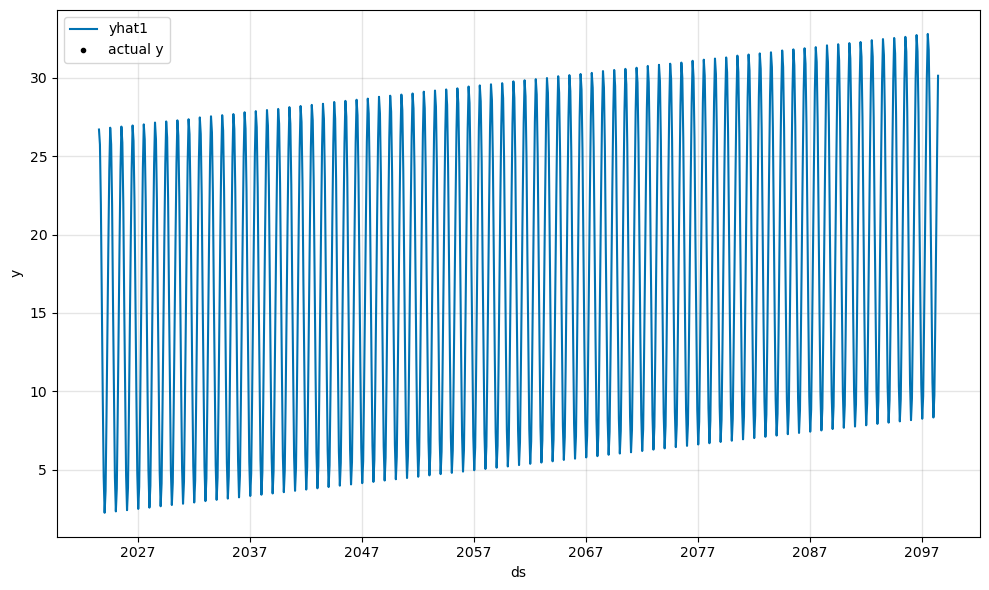

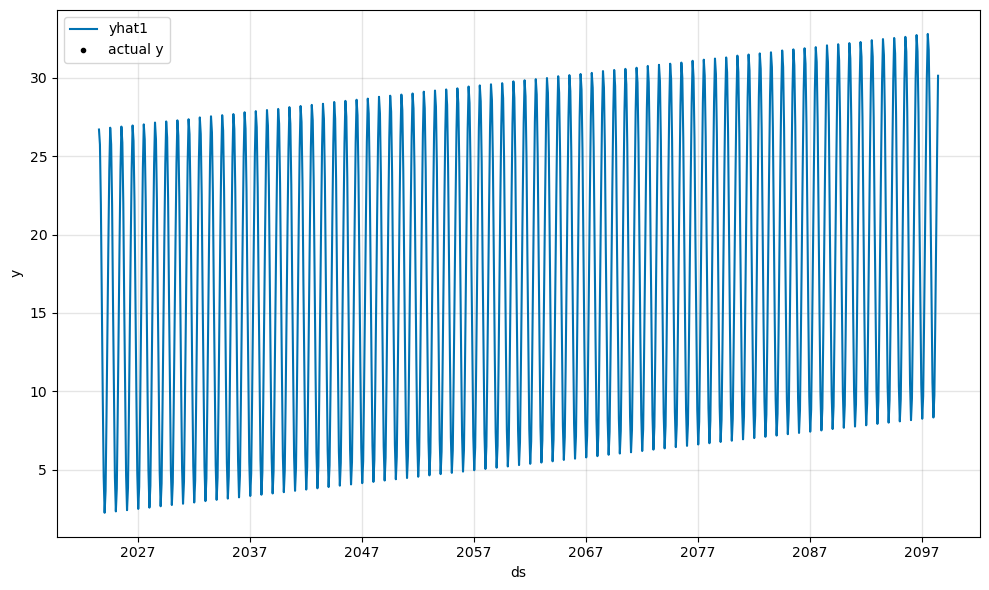

In [49]:
tavgplot = model_tavg.plot(forecast_tavg)
tavgplot

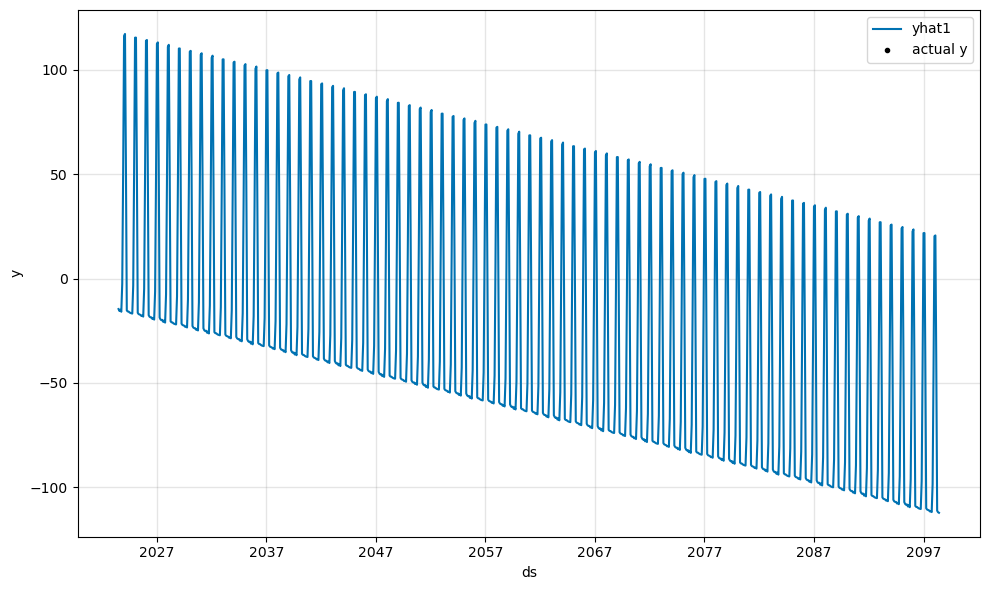

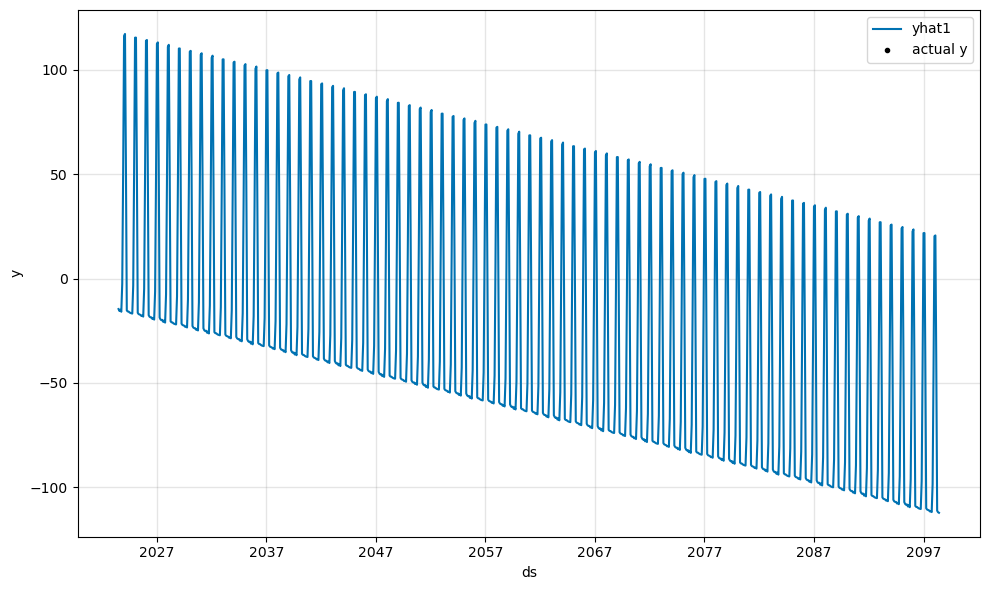

In [50]:
snowplot = model_snow.plot(forecast_snow)
snowplot

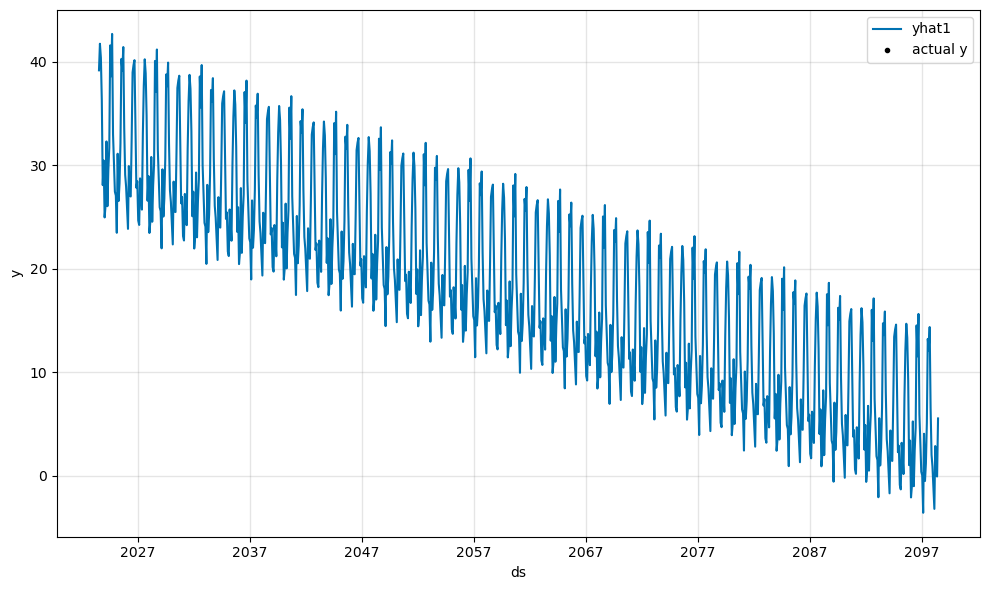

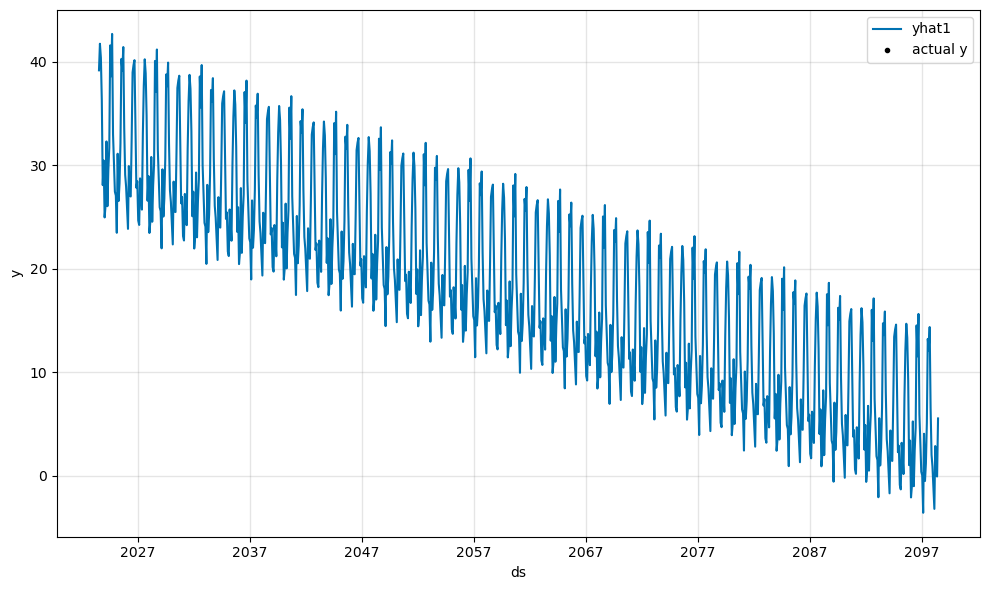

In [51]:
emxplot = model_emxp.plot(forecast_emxp)
emxplot

Enter attribute to plot (or 'done' to finish): TAVG


TypeError: 'Figure' object is not subscriptable

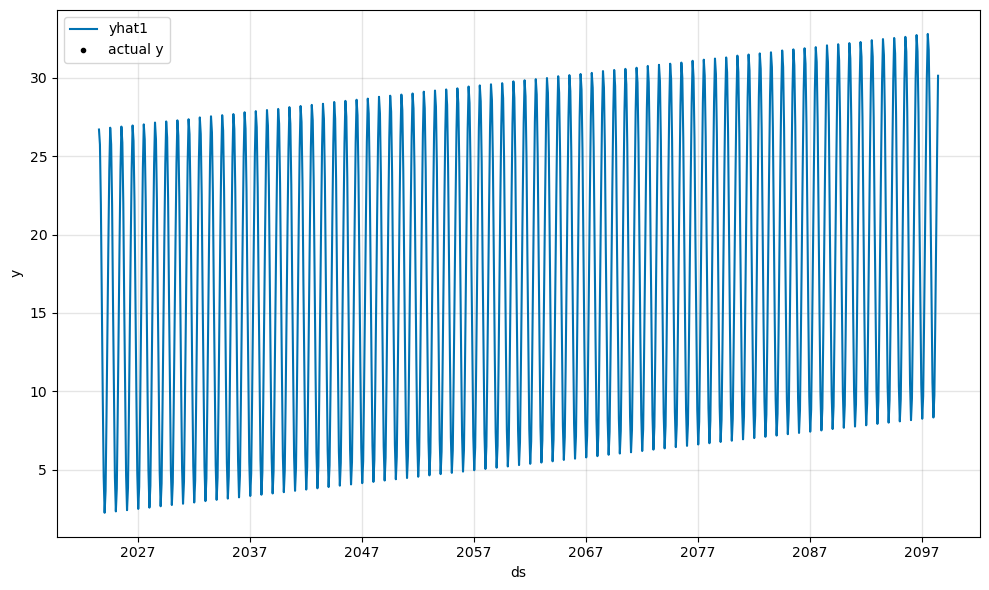

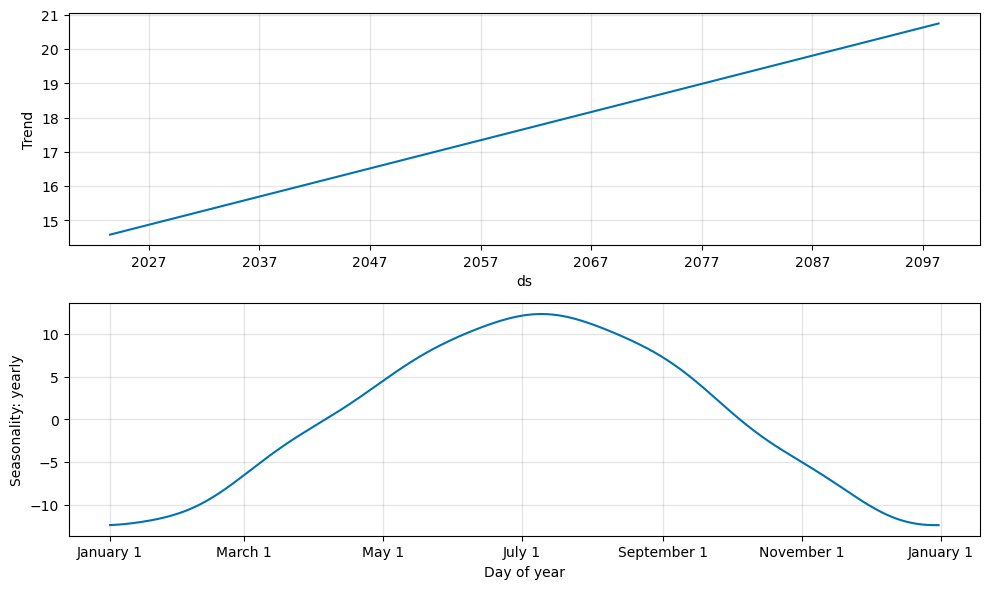

In [52]:
while True:
    attributes_to_plot = input("Enter attribute to plot (or 'done' to finish): ").strip().upper()

    if attributes_to_plot == 'DONE':
        print("Thank you!")
        break

    if attributes_to_plot in ['TAVG', 'EMXP', 'SNOW']:
        if attributes_to_plot == 'TAVG':
            plot_forecast = model_tavg.plot(forecast_tavg)
            plot_trend = model_tavg.plot_components(forecast_tavg)['trend']
            plot_seasonal = model_tavg.plot_components(forecast_tavg)['seasonal']
        elif attributes_to_plot == 'EMXP':
            plot_forecast = model_emxp.plot(forecast_emxp)
            plot_trend = model_emxp.plot_components(forecast_emxp)['trend']
            plot_seasonal = model_emxp.plot_components(forecast_emxp)['seasonal']
        elif attributes_to_plot == 'SNOW':
            plot_forecast = model_snow.plot(forecast_snow)
            plot_trend = model_snow.plot_components(forecast_snow)['trend']
            plot_seasonal = model_snow.plot_components(forecast_snow)['seasonal']

        plot_forecast.update_layout(title_text=f"Forecast for {attributes_to_plot}")
        plot_forecast.show()

        plot_trend.update_layout(title_text=f"Trend for {attributes_to_plot}")
        plot_trend.show()

        plot_seasonal.update_layout(title_text=f"Seasonal Variation for {attributes_to_plot}")
        plot_seasonal.show()

    else:
        print(f"Attribute {attributes_to_plot} not found.")